In [1]:
import numpy as np 
from astropy.table import Table
import astropy.table as atable
import matplotlib.pyplot as plt

from desitarget.io import read_targets_in_box
from desitarget.sv3.sv3_targetmask import desi_mask as sv3_desi_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [2]:
exps = Table.read('/global/cfs/cdirs/desi/spectro/redux/daily/tsnr-exposures.fits')

In [3]:
is_bright = exps['FAFLAVOR']  == 'sv3bright'
bgs_exps = exps[is_bright]

In [4]:
rosette1 = (bgs_exps['TILEID'] >= 39) & (bgs_exps['TILEID'] < 46)
rosette15 = (bgs_exps['TILEID'] >= 417) & (bgs_exps['TILEID'] < 421)

In [5]:
bgs_exps['TILEID','NIGHT'][rosette1]

TILEID,NIGHT
int32,int32
39,20210405
40,20210407
41,20210410
42,20210412
43,20210413
43,20210415
44,20210416
45,20210417


In [6]:
bgs_exps['TILEID', 'NIGHT'][rosette15]

TILEID,NIGHT
int32,int32
417,20210409
418,20210410
419,20210414
419,20210414
420,20210416


In [7]:
tiles3_targs = []
for i in bgs_exps['TILEID'][rosette1][:3]: 
    tiles3_targs.append(Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ALL%i_full.dat.fits' % i)['TARGETID', 'RA', 'DEC', 'SV3_DESI_TARGET', 'SV3_BGS_TARGET', 'Z', 'ZWARN'])
    
tiles4_targs = []
for i in bgs_exps['TILEID'][rosette1][:4]: 
    tiles4_targs.append(Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ALL%i_full.dat.fits' % i)['TARGETID', 'RA', 'DEC', 'SV3_DESI_TARGET', 'SV3_BGS_TARGET', 'Z', 'ZWARN'])

In [8]:
_stacked_tiles3 = atable.vstack(tiles3_targs)
stacked_tiles3 = atable.unique(_stacked_tiles3[_stacked_tiles3['Z'] != 1e20], keys='TARGETID')

_stacked_tiles4 = atable.vstack(tiles4_targs)
stacked_tiles4 = atable.unique(_stacked_tiles4[_stacked_tiles4['Z'] != 1e20], keys='TARGETID')

(-2.5, 2.5)

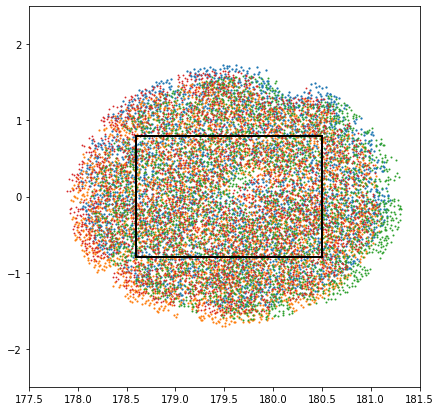

In [9]:
fig = plt.figure(figsize=(7,7))
sub = fig.add_subplot(111)

for i, tiles_targ in enumerate(tiles4_targs): 
    sub.scatter(tiles_targ['RA'][tiles_targ['Z'] != 1e20], tiles_targ['DEC'][tiles_targ['Z'] != 1e20], s=1.5-0.25*i)

sub.plot([178.6, 180.5], [0.8, 0.8], c='k', lw=2)
sub.plot([178.6, 180.5], [-0.8, -0.8], c='k', lw=2)
sub.plot([178.6, 178.6], [-0.8, 0.8], c='k', lw=2)
sub.plot([180.5, 180.5], [-0.8, 0.8], c='k', lw=2)

sub.set_xlim(177.5, 181.5)
sub.set_ylim(-2.5, 2.5)

In [10]:
targs = read_targets_in_box('/global/cfs/cdirs/desi/target/catalogs/dr9/0.57.0/targets/sv3/resolve/bright/', radecbox=[178.6, 180.5, -0.8, 0.8])

(-0.9, 0.9)

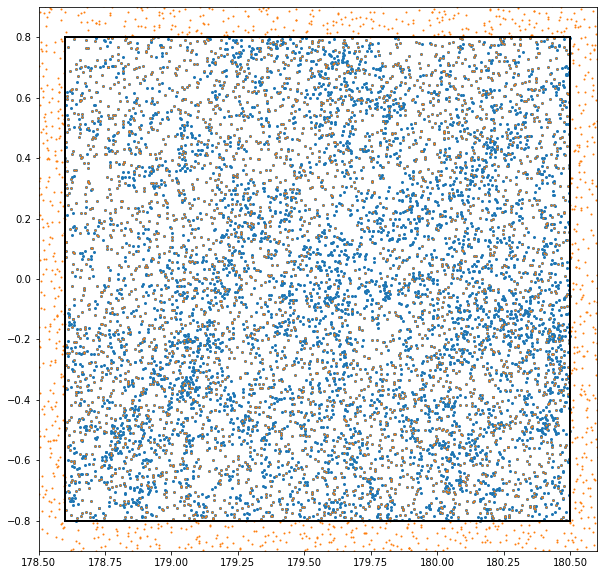

In [11]:
fig = plt.figure(figsize=(10, 10))
sub = fig.add_subplot(111)

sub.scatter(targs['RA'], targs['DEC'], s=4)
sub.scatter(stacked_tiles3['RA'], stacked_tiles3['DEC'], s=1)

sub.plot([178.6, 180.5], [0.8, 0.8], c='k', lw=2)
sub.plot([178.6, 180.5], [-0.8, -0.8], c='k', lw=2)
sub.plot([178.6, 178.6], [-0.8, 0.8], c='k', lw=2)
sub.plot([180.5, 180.5], [-0.8, 0.8], c='k', lw=2)

sub.set_xlim(178.5, 180.6)
sub.set_ylim(-0.9, 0.9)

In [12]:
in_box = ((targs['RA'] > 178.6) & (targs['RA'] < 180.5) & 
          (targs['DEC'] > -0.8) & (targs['DEC'] < 0.8))
is_bgs = (targs['SV3_DESI_TARGET'] & sv3_desi_mask['BGS_ANY']) != 0 
is_bgs_bright = (targs['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
is_bgs_faint = (targs['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 
is_bgs_faint_hip = (targs['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT_HIP']) != 0 

In [13]:
print('%i BGS targets in box' % np.sum(in_box & is_bgs))
print('%i BGS BRIGHT' % np.sum(in_box & is_bgs_bright))
print('%i BGS FAINT' % np.sum(in_box & is_bgs_faint))
print('%i BGS FAINT HIP' % np.sum(in_box & is_bgs_faint_hip))

5509 BGS targets in box
3438 BGS BRIGHT
2057 BGS FAINT
432 BGS FAINT HIP


In [14]:
for stacked_tiles in [stacked_tiles3, stacked_tiles4]: 
    in_box_fa = ((stacked_tiles['RA'] > 178.6) & (stacked_tiles['RA'] < 180.5) & 
                 (stacked_tiles['DEC'] > -0.8) & (stacked_tiles['DEC'] < 0.8))
    is_bgs_fa = (stacked_tiles['SV3_DESI_TARGET'] & sv3_desi_mask['BGS_ANY']) != 0 
    is_bgs_bright_fa = (stacked_tiles['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
    is_bgs_faint_fa = (stacked_tiles['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 
    is_bgs_faint_hip_fa = (stacked_tiles['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT_HIP']) != 0 
    
    print('%i BGS targets in box' % np.sum(in_box_fa & is_bgs_fa))
    print('%i BGS BRIGHT' % np.sum(in_box_fa & is_bgs_bright_fa))
    print('%i BGS FAINT' % np.sum(in_box_fa & is_bgs_faint_fa))
    print('%i BGS FAINT HIP' % np.sum(in_box_fa & is_bgs_faint_hip_fa))
    print()
    print('%f BGS targets in box' % (np.sum(in_box_fa & is_bgs_fa)/np.sum(in_box & is_bgs)))
    print('%f BGS BRIGHT' % (np.sum(in_box_fa & is_bgs_bright_fa)/np.sum(in_box & is_bgs_bright)))
    print('%f BGS FAINT' % (np.sum(in_box_fa & is_bgs_faint_fa)/np.sum(in_box & is_bgs_faint)))
    print('%f BGS FAINT HIP' % (np.sum(in_box_fa & is_bgs_faint_hip_fa)/np.sum(in_box & is_bgs_faint_hip)))
    print()

3227 BGS targets in box
2349 BGS BRIGHT
871 BGS FAINT
302 BGS FAINT HIP

0.585769 BGS targets in box
0.683246 BGS BRIGHT
0.423432 BGS FAINT
0.699074 BGS FAINT HIP

3940 BGS targets in box
2742 BGS BRIGHT
1187 BGS FAINT
359 BGS FAINT HIP

0.715193 BGS targets in box
0.797557 BGS BRIGHT
0.577054 BGS FAINT
0.831019 BGS FAINT HIP

